In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### 用户群体&行为画像

In [2]:
age_gender=pd.read_csv('../../tianmao/data_format1/user_info_format1.csv')
age_gender.head(5)
#年龄：0和null表示未知，其他表示小于其10岁的年龄段
#性别：2和null表示未知，0表示女性，1表示男性

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


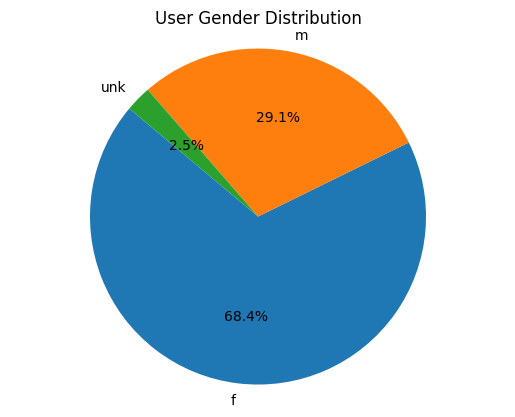

In [5]:
age_cnt=age_gender['gender'].value_counts()
plt.pie(age_cnt, labels=['f','m','unk'], autopct='%1.1f%%', startangle=140)  
plt.axis('equal')  
plt.title('User Gender Distribution')
plt.show()  

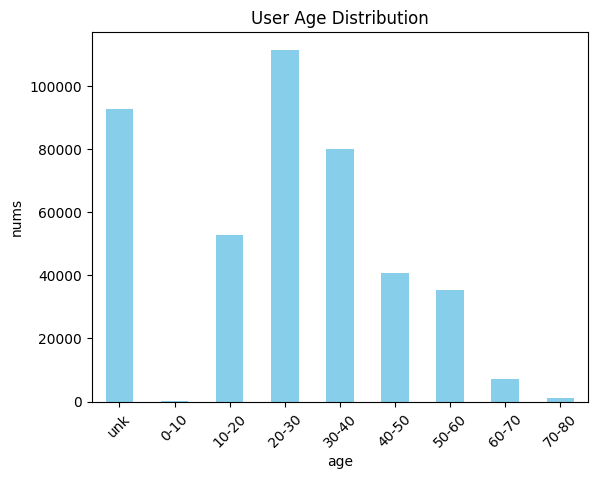

In [14]:
gender_cnt=age_gender['age_range'].value_counts().sort_index()
gender_cnt.index=['unk','0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
gender_cnt.plot(kind='bar',color='skyblue')
plt.xticks(rotation=45)
plt.ylabel('nums') 
plt.xlabel('age') 
plt.title('User Age Distribution') 
plt.show()

In [15]:
shop_info=pd.read_csv('../../tianmao/data_format1/user_log_format1.csv')
shop_info.head(5)
#cat_id 商品所属品类的唯一编码
#action_type 包含{0, 1, 2, 3}，0表示单击，1表示添加到购物车，2表示购买，3表示添加到收藏夹

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


<Axes: xlabel='action_type'>

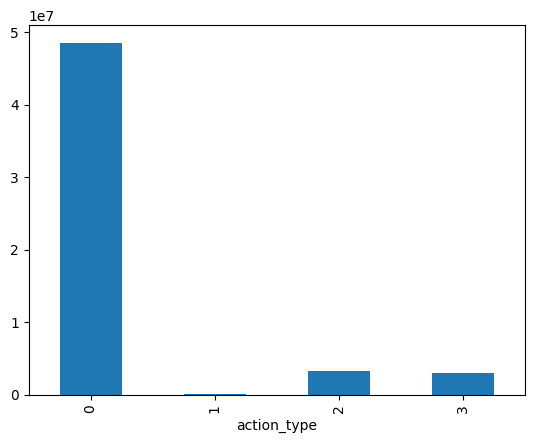

In [30]:
action_cnt=shop_info['action_type'].value_counts().sort_index()
action_cnt.plot(kind='bar')
#不同行为统计，单击其实不太具有参考性

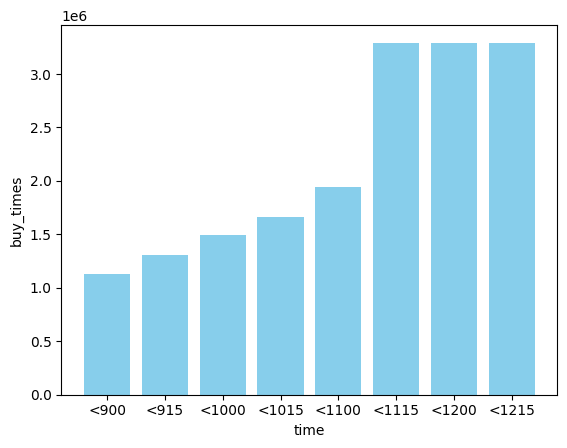

In [29]:
buy_times=[]
times=[]
for i in range(0,4):
    for j in range(0,2):
        buy_cnt=shop_info[(shop_info['time_stamp']<900+i*100+j*15)&(shop_info['action_type']==2)]
        buy_times.append(len(buy_cnt['user_id']))
        times.append('<'+str(900+i*100+j*15))
plt.bar(times,buy_times,color='skyblue')
plt.ylabel('buy_times') 
plt.xlabel('time') 
plt.show()
#以半个月为间隔统计购买行为发生次数

### 特征设计
| user_id | user_gender | user_age | cat_id | cat_id_click | cat_id_star | cat_id_buy | seller_id | sell_id_buy | buy_before_11 | buy_in_11 |  
| 用户id | 用户性别     | 用户年龄  | 商品类型  |  类型点击次数 |  类型收藏次数  | 类型购买次数  | 商店id   |   商店购买次数 |  双11之前是否购买过 | 双11是否购买过 |